### KNN Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import dataset
# dataset = pd.read_csv('dataset.csv')

In [3]:
dataset

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [27]:
#Extracting Independent and dependent Variable  
#x = dataset.iloc[:, [2,3]].values  
#y = dataset.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [28]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [9]:
x_train

array([[-5.24135566e-01, -1.51364607e-01],
       [ 1.72581223e+00, -8.56455433e-01],
       [-6.26405920e-01, -7.33830941e-01],
       [-4.21865211e-01,  8.29631325e-01],
       [ 1.62354187e+00, -9.79079924e-01],
       [-1.24002805e+00,  5.84382342e-01],
       [-5.24135566e-01, -4.27269713e-01],
       [-4.21865211e-01,  3.25721306e-02],
       [ 1.41900117e+00, -9.48423802e-01],
       [ 3.96297623e-01,  2.47164991e-01],
       [ 8.94865600e-02,  2.85293544e+00],
       [ 1.52127152e+00, -8.87111556e-01],
       [-4.21865211e-01,  1.91600768e-03],
       [-1.24002805e+00, -1.16301666e+00],
       [-2.17324503e-01,  7.07006834e-01],
       [-1.13775769e+00,  8.90943571e-01]])

In [29]:
x_test

array([[ 1.26936691, -1.08736508],
       [-0.59429451,  0.74222873],
       [-1.37899406,  0.80531817],
       [-0.00576985, -1.21354397],
       [ 0.28849248, -1.15045453]])

In [30]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

In [32]:
y_pred

array([1, 0, 0, 0, 1], dtype=int64)

In [33]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [34]:
cm

array([[3, 1],
       [0, 1]], dtype=int64)

In [35]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


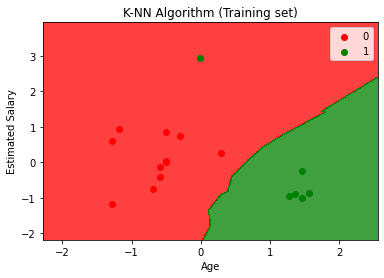

In [36]:
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
    c = ListedColormap(('r', 'g'))(i), label = j)  
plt.title('K-NN Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

In [37]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


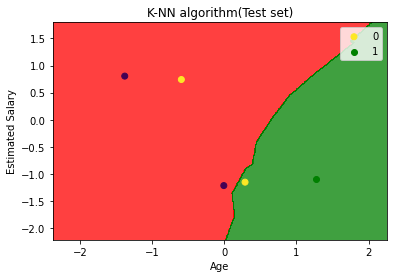

In [38]:
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('r','g' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('r', 'g'))(i), label = j)  
plt.title('K-NN algorithm(Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  